In [22]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def read_csvs(dirPath):
    files = os.listdir(dirPath)
    csvs = [csv for csv in files if csv.endswith('.csv')]
    csvs.sort(key = lambda x: int(x[1:-4]))
    
    for inx,csv in enumerate(csvs):
        
        if inx == 0:
            merged_df = pd.read_csv(dirPath + csv)
            merged_df['video'] = 0 
        else :
            temp_df = pd.read_csv(dirPath + csv)
            temp_df['video'] = inx
            merged_df = merged_df.append(temp_df)

    return merged_df.reset_index(drop=True)

In [3]:
happyPath = 'dataset/happy_frames_openface/'
happy_df = read_csvs(happyPath)

nervousPath = 'dataset/nervous_frames_openface/'
nervous_df = read_csvs(nervousPath)

In [4]:
AUs = [' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', 'video']
happy_au_df = happy_df.loc[:,AUs]
nervous_au_df = nervous_df.loc[:, AUs]

In [5]:
happy_max_au = happy_au_df.groupby('video').max()
nervous_max_au = nervous_au_df.groupby('video').max() 

In [12]:
happy_au_arr = (happy_max_au > 2.5).sum()
nervous_au_arr = (nervous_max_au > 2.5).sum()

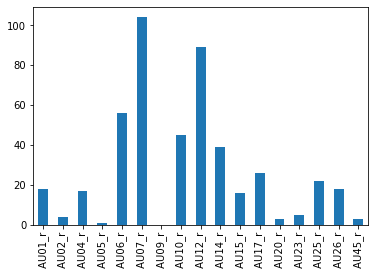

In [13]:
happy_au_arr.plot.bar()

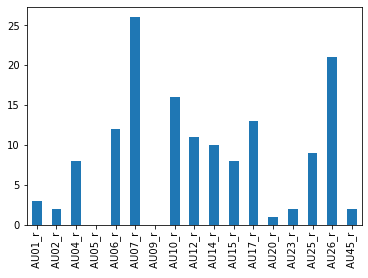

In [14]:
nervous_au_arr.plot.bar()

In [82]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [65]:
x_happy = happy_au_df.drop(['video'],axis=1).values
x_nervous = nervous_au_df.drop(['video'],axis=1).values

X = np.concatenate((x_happy, x_nervous ))

y = np.concatenate((np.zeros((x_happy.shape[0], )) , np.ones(x_nervous.shape[0], )))

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size = 0.2)

In [151]:
clf = svm.SVC(kernel = 'rbf'
             ,C = 10)

In [152]:
clf.fit(X_train,y_train)

SVC(C=10)

In [153]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8418730080902181

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      2769
         1.0       0.81      0.67      0.73      1310

    accuracy                           0.84      4079
   macro avg       0.83      0.80      0.81      4079
weighted avg       0.84      0.84      0.84      4079



In [215]:
clfs = [svm.SVC(C = c).fit(X_train,y_train) for c in range(50,1000,50)]

In [216]:
reports = [classification_report(y_test,clf.predict(X_test)) for clf in clfs]

In [234]:
print(reports[18])

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2769
         1.0       0.87      0.82      0.85      1310

    accuracy                           0.90      4079
   macro avg       0.90      0.88      0.89      4079
weighted avg       0.90      0.90      0.90      4079



In [ ]:
with pd.option_context('display.max_rows', 200, 'display.max_columns', 700):  # more options can be specified also
    display(nervous_df.loc[cond1,:])

100.0